<h1>Entrega Actividad 4 – Juan Carlos López Borda</h1>

<h2><b>¿Qué características debe tener en cuenta un desarrollador para crear un videojuego exitoso para ser distribuido en la plataforma Steam?</b></h2>

<img src="https://i.kinja-img.com/gawker-media/image/upload/c_fit,f_auto,g_center,q_60,w_965/bzaxrwvlodzvtyiwdc51.jpg" alt="">

<h2><b>Introducción</h2>

<p class="text-justify">
<b>Contexto Problema:</b> Un nuevo desarrollador de videojuegos pretende salir al mercado, pero para ser competitivo con las grandes empresas necesita antes revisar que características debe tener un videojuego para ser exitoso en la plataforma Steam.<br><br>
<b>Hipótesis:</b><br>
•	El éxito de los videojuegos recientes proviene netamente de si fue desarrollado por una de las grandes empresas<br>
•	Los videojuegos Free to Play son los que poseen mayor concurrencia debido a su gratuidad de acceso<br><br>
<b>Objetivo:</b> Predecir qué tipo de videojuegos se deben desarrollar a futuro para ser exitosos y competitivos en la plataforma Steam.<br><br>
<b>Contexto Analítico:</b> Tomando en cuenta el problema se realiza una búsqueda de una base de datos de Steam actualizada, en la plataforma web <a href="https://www.kaggle.com/">https://www.kaggle.com/</a> se encuentra un DataSet con información de todos los videojuegos publicados para distribución en esta plataforma, junto con algunas características.
</p>

<h2><b>Abstract</h2>

In [1]:
# Se importan librerías
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import folium
from folium.features import GeoJsonTooltip

<h2><b>Variables</h2>

<p class="text-justify">
•	<b>Developer:</b> La variable desarrollador es de importancia puesto que evidencia cuales empresas de desarrollo han tenido más éxito.<br>
•	<b>Genre:</b> La variable genero evidencia que cual es el genero mas buscado por los Gamers.<br>
•	<b>Positive Reviews:</b> La cantidad de reseñas positivas evidencian la aceptación del videojuego.<br>
•	<b>Negative Reviews:</b> La cantidad de reseñas negativas evidencian la negación al videojuego.<br>
•	<b>CCU (Concurrent Steam Users):</b> La concurrencia de los usuarios Steam frente al video juego demuestra la cantidad de aficionados que posee.<br>
•	<b>Owners:</b> La variable propietarios demuestra la cantidad de usuarios que han comprado el videojuego.<br>
•	<b>Name:</b> La variable nombre lista los videojuegos distribuidos en la plataforma Steam.<br>
•	<b>Release Date:</b>  La variable fecha de lanzamiento demuestra el día que empezó a ser distribuido el videojuego

</p>

<h2><b>Proceso de análisis exploratorio de datos (EDA)</h2>

In [21]:
# Se carga el DataSet
url = "https://media.githubusercontent.com/media/JuanC-Pythonista/Proyecto_Data_Science_Unidad1/main/DataSetBootcamp/All_Steam_Games_DataSet.csv"
DataSet = pd.read_csv(url, sep=";", encoding="latin-1")
# Se remplaza el punto en la columna Owners por “nada” para que los valores sean mas aptos para operaciones
DataSet["Owners"] = DataSet["Owners"].str.replace(".", "")
# Se cambia el tipo de dato de la variable Owners de Object a Int64 para que sea de tipo numérico y 
# se cambia el tipo de dato de la variable Release Date a Datetime
DataSet["Owners"] = DataSet["Owners"].astype("int64")
DataSet["Release Date"] = DataSet["Release Date"].astype("datetime64[D]")
# Se utiliza el set_option para aumentar la cantidad de columnas a visualizar y se muestran los valores por medio
# de una tabla del DataSet cargado
pd.set_option("display.max_columns", None)
DataSet.head(5)

C:\Users\jlope\AppData\Local\Temp\ipykernel_8480\393926932.py:9: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  DataSet = pd.read_csv(url, sep=";", encoding="latin-1")
C:\Users\jlope\AppData\Local\Temp\ipykernel_8480\393926932.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  DataSet["Owners"] = DataSet["Owners"].str.replace(".", "")
C:\Users\jlope\AppData\Local\Temp\ipykernel_8480\393926932.py:14: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  DataSet["Release Date"] = DataSet["Release Date"].astype("datetime64[D]")


,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,Positive Reviews,Negative Reviews,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...",20000000,201215,5199,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000-01-11,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
1,1000000,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...",20000,27,5,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021-05-14,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...",500000,4032,646,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020-10-16,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
3,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...",200000,1575,115,1999,1999,0,76,English,"windows, mac",2020-10-14,0,http://www.cookservedelicious.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,1000040,ç»èæäº,è¿æ¯ä¸æ¬¾æå»æåè¶³çç»èä¸»é¢æ¸¸æ...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,20000,0,1,199,199,0,0,Simplified Chinese,windows,2019-03-30,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...


In [22]:
# Se revisan los tipos de datos de las variables
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55691 entries, 0 to 55690
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App ID             55691 non-null  int64         
 1   Name               55691 non-null  object        
 2   Short Description  55654 non-null  object        
 3   Developer          55562 non-null  object        
 4   Publisher          55540 non-null  object        
 5   Genre              55530 non-null  object        
 6   Tags               55556 non-null  object        
 7   Type               55691 non-null  object        
 8   Categories         54721 non-null  object        
 9   Owners             55691 non-null  int64         
 10  Positive Reviews   55691 non-null  int64         
 11  Negative Reviews   55691 non-null  int64         
 12  Price              55691 non-null  int64         
 13  Initial Price      55691 non-null  int64         
 14  Discou

In [24]:
# Se realizan GroupBy y Sort con las variables cualitativas más significativas y se realiza una sumatoria para ver 
# los valores unificados de las variables cuantitativas, por otro lado, se ordenan de manera descendente y finalmente 
# se muestra la tabla agrupada y ordenada

DataSetSum0 = DataSet.groupby(["Developer"], sort=False).sum()
DataSetSort0 = DataSetSum0.sort_values(["Owners"], ascending=False)
DataSetSort01 = DataSetSum0.sort_values(["Positive Reviews"], ascending=False)
DataSetSort02 = DataSetSum0.sort_values(["Negative Reviews"], ascending=False)
DataSetSort03 = DataSetSum0.sort_values(["Discount"], ascending=False)
DataSetSort04 = DataSetSum0.sort_values(["CCU"], ascending=False)

# NombreLista = NombreDataSet['Columna'].tolist() # Todo
DataSetList01 = DataSetSort0.iloc[0:30].index.to_list()  # 30
DataSetFilter01 = DataSet.loc[DataSet["Developer"].isin(DataSetList01)]
# -----------------------------------------------------------------------------------------
DataSetSum1 = DataSet.groupby(["Genre"], sort=False).sum()
DataSetSort1 = DataSetSum1.sort_values(["Owners"], ascending=False)
DataSetSort11 = DataSetSum1.sort_values(["Positive Reviews"], ascending=False)
DataSetSort12 = DataSetSum1.sort_values(["Negative Reviews"], ascending=False)
DataSetSort13 = DataSetSum1.sort_values(["Discount"], ascending=False)
DataSetSort14 = DataSetSum1.sort_values(["CCU"], ascending=False)
# -----------------------------------------------------------------------------------------
DataSetSum2 = DataSet.groupby(["Categories"], sort=False).sum()
DataSetSort2 = DataSetSum2.sort_values(["Owners"], ascending=False)
DataSetSort21 = DataSetSum2.sort_values(["Positive Reviews"], ascending=False)
DataSetSort22 = DataSetSum2.sort_values(["Negative Reviews"], ascending=False)
DataSetSort23 = DataSetSum2.sort_values(["Discount"], ascending=False)
DataSetSort24 = DataSetSum2.sort_values(["CCU"], ascending=False)
# -----------------------------------------------------------------------------------------
DataSetSum3 = DataSet.groupby(["Platforms"], sort=False).sum()
DataSetSort3 = DataSetSum3.sort_values(["Owners"], ascending=False)
DataSetSort31 = DataSetSum3.sort_values(["Positive Reviews"], ascending=False)
DataSetSort32 = DataSetSum3.sort_values(["Negative Reviews"], ascending=False)
DataSetSort33 = DataSetSum3.sort_values(["Discount"], ascending=False)
DataSetSort34 = DataSetSum3.sort_values(["CCU"], ascending=False)

C:\Users\jlope\AppData\Local\Temp\ipykernel_8480\1614056040.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DataSetSum0 = DataSet.groupby(["Developer"], sort=False).sum()
C:\Users\jlope\AppData\Local\Temp\ipykernel_8480\1614056040.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DataSetSum1 = DataSet.groupby(["Genre"], sort=False).sum()
C:\Users\jlope\AppData\Local\Temp\ipykernel_8480\1614056040.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which 

<h2><b>Visualizaciones</b></h2>

Text(0.5, 1.0, 'Videojuego más vendido')

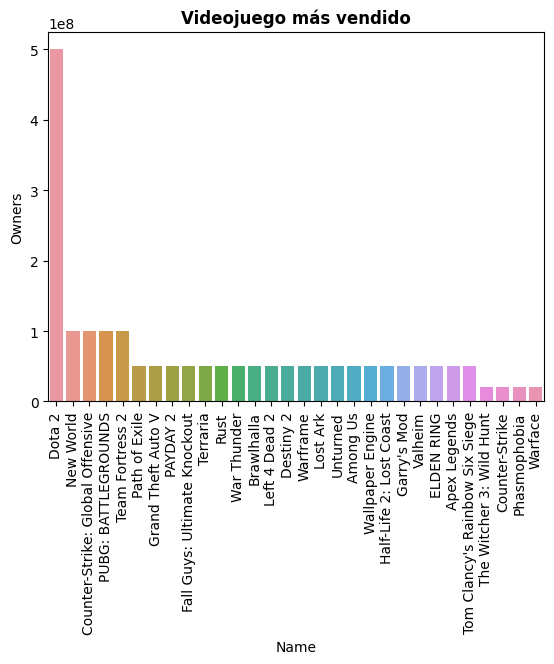

In [110]:
# Se realiza grafico por medio de la librería Seaborn que corresponde a un diagrama de barras
DataSetGames1=DataSet[["Name","Owners"]].set_index('Name')
DataSetSort5=DataSetGames1.sort_values(["Owners"], ascending=False)
sns.barplot(data=DataSetSort5.head(30),x=DataSetSort5.head(30).index,y=DataSetSort5["Owners"].head(30))#y=ha["Owners"].head(30)
plt.xticks(rotation=90)
plt.title('Videojuegos más vendidos', size=12, fontweight="bold")

<p class="text-justify"><b>
El diagrama de barras pretende mostrar cual es el videojuego más vendido, según el grafico el videojuego mas vendido es DOTA2 , seguido en un rango menor por  New World y Counter-Strike: Global Offensive
</p>

Text(0.5, 1.0, 'Fechas de lanzamiento por Video Juego')

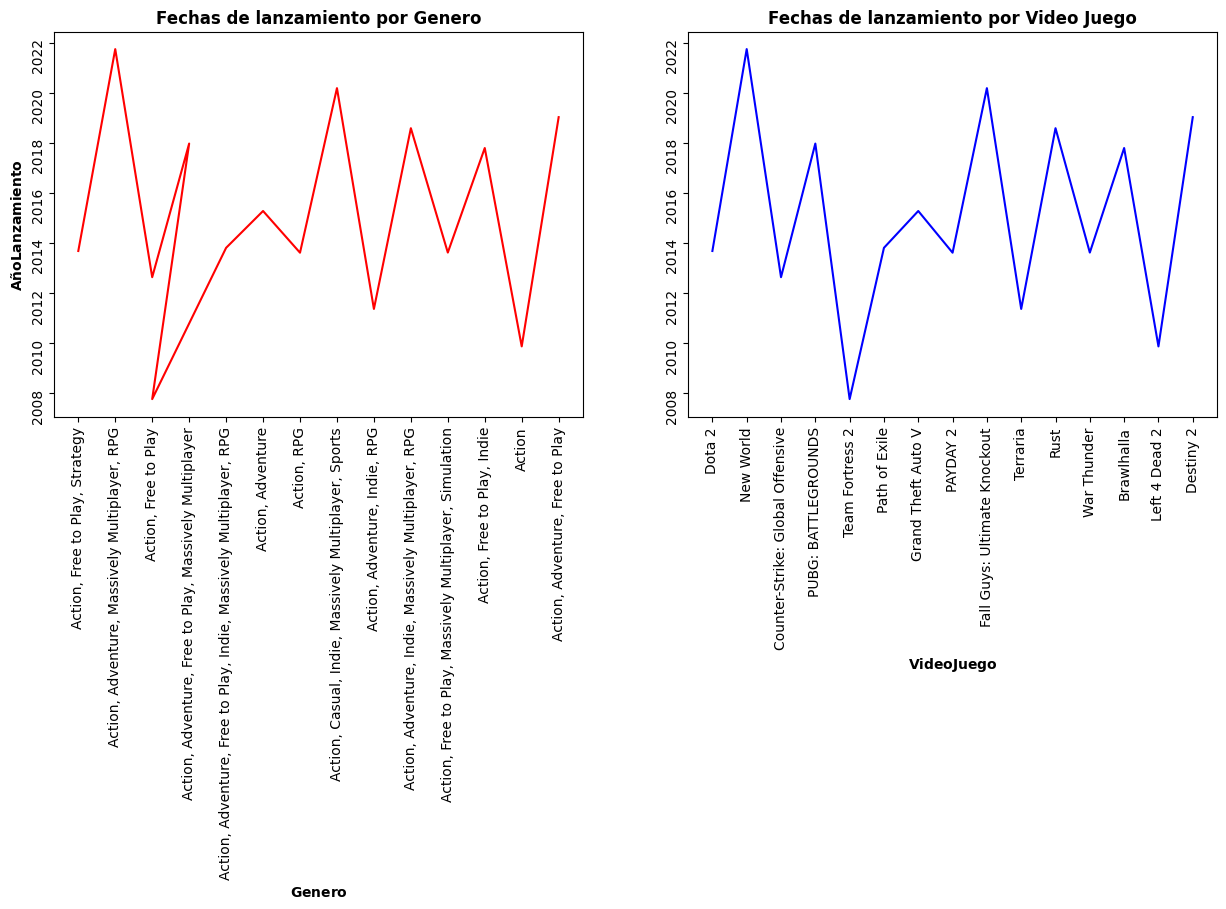

In [106]:
# Se realiza grafico por medio de la librería Matplotlib que corresponde a dos series temporales
DataSetGames = DataSet[["Name", "Owners", "Release Date", "Genre"]].set_index("Name")
DataSetSort4 = DataSetGames.sort_values(["Owners"], ascending=False)

f, (at, at1) = plt.subplots(
    nrows=1, ncols=2, figsize=(15, 5)
)  # sharex=True, sharey=True
at.plot(
    DataSetSort4["Genre"].head(15), DataSetSort4["Release Date"].head(15), color="r"
)
at.set_xlabel(r"$\mathbf{Genero}$")
at.set_ylabel(r"$\mathbf{Año Lanzamiento}$")
at.tick_params(labelrotation=90)
at.set_title("Fechas de lanzamiento por Genero", size=12, fontweight="bold")
at1.plot(DataSetSort4.head(15).index, DataSetSort4["Release Date"].head(15), color="b")
at1.set_xlabel(r"$\mathbf{Video Juego}$")
at1.tick_params(labelrotation=90)
at1.set_title("Fechas de lanzamiento por Video Juego", size=12, fontweight="bold")

<p class="text-justify"><b>
Los gráficos de series temporales pretender mostrar en que años se tuvieron mayores ventas con respeto a videojuegos y a géneros de videojuegos, según los gráficos la mayoría de los picos se pueden encontrar en un rango del 2018 y 2020, evidenciando un rango generacional de los compradores preponderante. 
</p>

Text(0.5, 1.0, 'Desarrollador con más reseñas negativas')

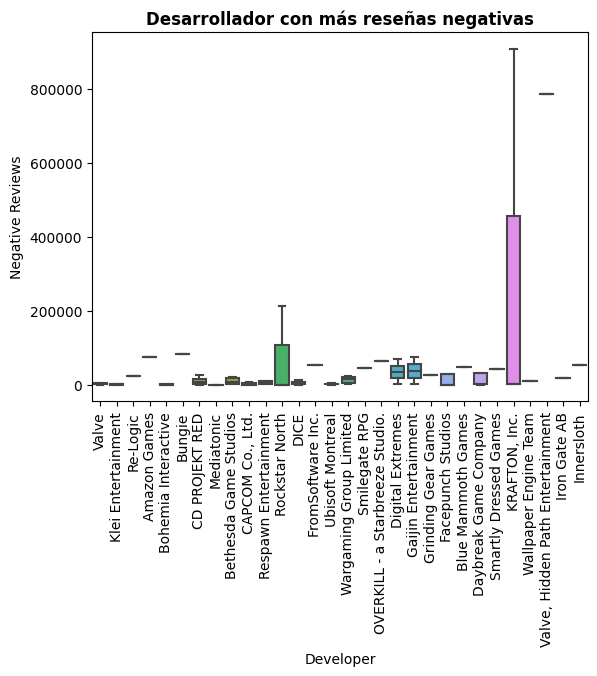

In [111]:
# Se realiza grafico por medio de la librería Seaborn que corresponde un Diagrama de caja
sns.boxplot(x="Developer", y="Negative Reviews", data=DataSetFilter01, showfliers=False)
plt.xticks(rotation=90)
plt.title('Desarrollador con más reseñas negativas', size=12, fontweight="bold")

<p class="text-justify"><b>
El diagrama de cajas y bigotes pretende mostrar cuales son los desarrolladores que han recibido más reseñas negativas y cuáles son sus porcentajes aproximados, según el grafico el desarrollador con mas reseñas negativas es KRAFTON, Inc., en un rango del 75% Q3 de 500000 reseñas negativas y un 100% Q4 de 900000 reseñas negativas, seguido por Valve, Hidden Path Entertainment con un valor atípico entre las 800000 reseñas negativas y Rockstar North en un rango del 75% Q3 de 100000 reseñas negativas y un 100% Q4 de 200000 reseñas negativas.
</p>

Text(0.5, 1.0, 'Géneros de videojuegos más utilizado por los desarrolladores')

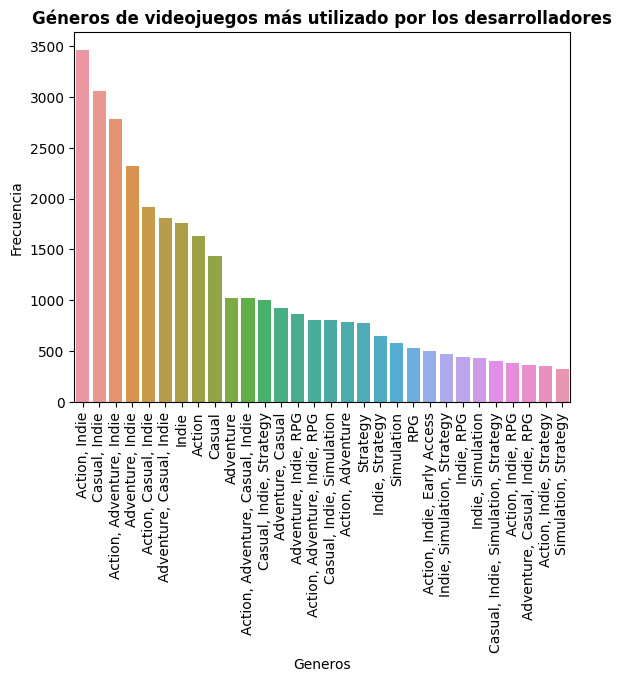

In [117]:
# Se realiza grafico por medio de la librería Seaborn que corresponde a un diagrama de barras
sns.barplot(x=DataSet["Genre"].value_counts().head(30).index,y=DataSet["Genre"].value_counts().head(30).values)
plt.xticks(rotation=90)
plt.xlabel('Generos')
plt.ylabel('Frecuencia')
plt.title('Géneros de videojuegos más utilizado por los desarrolladores', size=12, fontweight="bold")

In [116]:
DataSet["Genre"].value_counts().head(30).values

array([3460, 3060, 2783, 2316, 1914, 1811, 1756, 1633, 1433, 1021, 1018,
       1000,  928,  867,  807,  801,  784,  779,  647,  579,  534,  498,
        470,  444,  434,  407,  379,  360,  356,  323], dtype=int64)

<p class="text-justify"><b>
El diagrama de barras pretende mostrar cual es el género más utilizado por los desarrolladores para crear los videojuegos, según el grafico el videojuego más usado es el (Action, Indie), seguido por el (Casual, Indie) y el (Action, Adventure, indie)
</p>

Text(0.5, 1.0, 'Desarrolladores con mas titulos de videojuegos publicados en Steam')

C:\Users\jlope\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
C:\Users\jlope\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 145 (\x91) missing from current font.
  func(*args, **kwargs)
C:\Users\jlope\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 156 (\x9c) missing from current font.
  func(*args, **kwargs)
C:\Users\jlope\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jlope\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jlope\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarnin

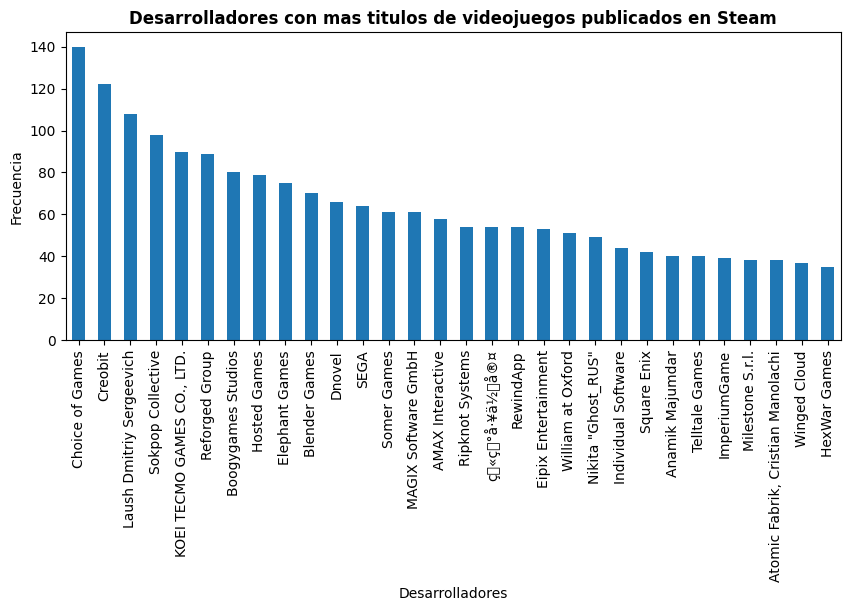

In [114]:
# Se realiza grafico por medio de la librería  Matplotlib que corresponde a un diagrama de barras
DataSet["Developer"].value_counts()[0:30].plot(
    kind="bar",
    figsize=(10, 4),
    xlabel="Desarrolladores",
    ylabel="Frecuencia",
    #title="Desarrolladores con mas titulos de videojuegos publicados en Steam",
)
plt.title("Desarrolladores con mas titulos de videojuegos publicados en Steam", size=12, fontweight="bold")


<p class="text-justify"><b>
El diagrama de barras pretende mostrar cual es el desarrollador que posee más títulos publicados en la plataforma Steam, según el grafico los desarrolladores que más poseen títulos en esta plataforma son Choise of games con más de 130 títulos, Creobit con mas de 120 y Laush Dmitriy Sergeevich con mas de 100 títulos.
</p>

(array([], dtype=float64), [])

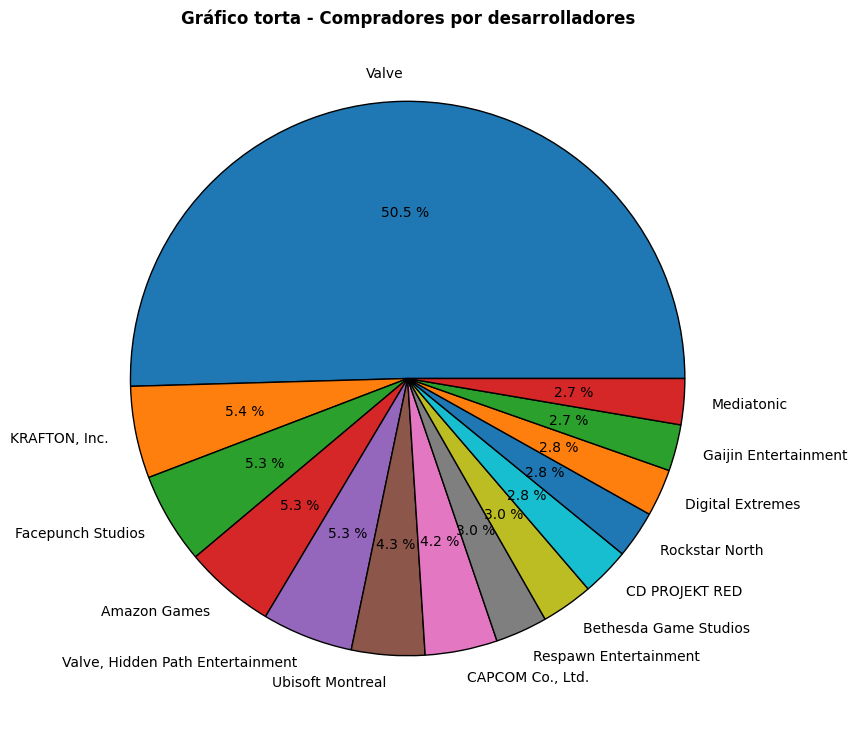

In [29]:
# Se realiza grafico por medio de la librería Matplotlib que corresponde a un diagrama de torta
fig, ax = plt.subplots(figsize=(10, 9))
ax.pie(
    DataSetSort0["Owners"].iloc[:14],
    labels=DataSetSort0.iloc[:14].index,
    autopct="%0.1f %%",
    wedgeprops={"edgecolor": "black"},
)
plt.title("Compradores por desarrolladores", size=12, fontweight="bold")
plt.xticks(rotation=90)

<p class="text-justify"><b>
El grafico de torta pretende mostrar el porcentaje de compradores con respecto a los desarrolladores de los videojuegos, según el grafico el desarrollador con más compradores es Valve Corporation con el 50.5%, seguido de manera distante por KRAFTON con 5.4%, Inc. y Amazon Games 5.3%
</p>

Text(0.5, 1.0, 'Histograma Concurrent Steam Users y géneros ')

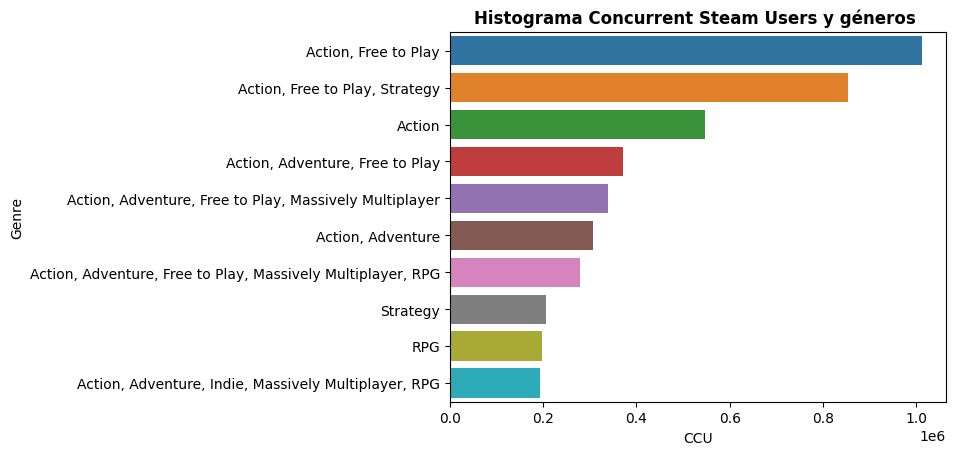

In [30]:
# Se realiza grafico por medio de la librería SeaBorn, este corresponde a un histograma
sns.barplot(data=DataSetSort14.head(10), x="CCU", y=DataSetSort14.head(10).index)
plt.title("Concurrent Steam Users por géneros ", size=12, fontweight="bold")

<p class="text-justify"><b>El Histograma pretende mostrar la variable Concurrent Steam Users con respecto al género del video juego, según el grafico la mayor concurrencia de usuarios Steam (CCU) se da en el género Action, Free to Play seguido por el género Action, Free to Play, Strategy</p>